# problem statement2 : 
- Implement Graph Convolutional Networks (GCN) + LSTM for demand prediction

## Creating Adjacency matrix

In [2]:
import pandas as pd
import networkx as nx
import geopandas as gpd

In [47]:
zones = gpd.read_file(r"C:\Users\Dell\Downloads\taxi_zones")
zones = zones.to_crs(epsg=4326)
zones = zones.sort_values(by="LocationID").reset_index(drop=True)



In [48]:
zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.695, -74.18449 40.6951,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [49]:
import numpy as np
import pandas as pd

location_ids = zones["LocationID"].values
n = len(location_ids)

adj = np.zeros((n, n), dtype=int)

for i in range(n):
    geom_i = zones.geometry.iloc[i]
    for j in range(i+1, n):
        geom_j = zones.geometry.iloc[j]
        if geom_i.touches(geom_j):
            adj[i, j] = 1
            adj[j, i] = 1

adj_matrix = pd.DataFrame(adj, index=location_ids, columns=location_ids)


In [51]:
adj_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,103,103,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Loading datasets

In [13]:
yellow = pd.read_parquet(r"C:\Users\Dell\Downloads\yellow_tripdata_2025-01.parquet")
green =  pd.read_parquet(r"C:\Users\Dell\Downloads\green_tripdata_2025-01.parquet")
fhv =    pd.read_parquet(r"C:\Users\Dell\Downloads\fhv_tripdata_2025-01.parquet")
fhvhv =  pd.read_parquet(r"C:\Users\Dell\Downloads\fhvhv_tripdata_2025-01.parquet")

In [14]:
yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.00,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.10,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.00
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.10,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.00
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.20,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.00
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.80,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-31 23:01:48,2025-01-31 23:16:29,NaN,3.35,NaN,None,79,237,0,15.85,0.0,0.5,0.00,0.0,1.0,20.60,NaN,NaN,0.75
3475222,2,2025-01-31 23:50:29,2025-02-01 00:17:27,NaN,8.73,NaN,None,161,116,0,28.14,0.0,0.5,0.00,0.0,1.0,32.89,NaN,NaN,0.75
3475223,2,2025-01-31 23:26:59,2025-01-31 23:43:01,NaN,2.64,NaN,None,144,246,0,14.91,0.0,0.5,0.00,0.0,1.0,19.66,NaN,NaN,0.75
3475224,2,2025-01-31 23:14:34,2025-01-31 23:34:52,NaN,3.16,NaN,None,142,107,0,17.55,0.0,0.5,0.00,0.0,1.0,22.30,NaN,NaN,0.75


In [16]:
print("Shape:", yellow.shape)
print("-------------------------------------------------")
print(yellow.dtypes)         


Shape: (3475226, 20)
-------------------------------------------------
VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
cbd_congestion_fee              float64
dtype: object


In [17]:
green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48321,2,2025-01-31 19:36:00,2025-01-31 20:05:00,None,NaN,179,132,NaN,13.99,55.61,...,0.5,11.42,0.00,NaN,1.0,68.53,NaN,NaN,NaN,NaN
48322,2,2025-01-31 20:33:00,2025-01-31 20:41:00,None,NaN,166,75,NaN,1.51,13.58,...,0.5,2.26,0.00,NaN,1.0,17.34,NaN,NaN,NaN,NaN
48323,2,2025-01-31 21:09:00,2025-01-31 21:30:00,None,NaN,41,42,NaN,2.90,30.89,...,0.5,0.00,0.00,NaN,1.0,32.39,NaN,NaN,NaN,NaN
48324,2,2025-01-31 22:22:00,2025-01-31 22:25:00,None,NaN,75,43,NaN,0.34,14.78,...,0.5,2.44,0.00,NaN,1.0,18.72,NaN,NaN,NaN,NaN


In [18]:
print("Shape:", green.shape)
print("-------------------------------------------------")
green.info()


Shape: (48326, 21)
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48326 entries, 0 to 48325
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               48326 non-null  int32         
 1   lpep_pickup_datetime   48326 non-null  datetime64[us]
 2   lpep_dropoff_datetime  48326 non-null  datetime64[us]
 3   store_and_fwd_flag     46490 non-null  object        
 4   RatecodeID             46490 non-null  float64       
 5   PULocationID           48326 non-null  int32         
 6   DOLocationID           48326 non-null  int32         
 7   passenger_count        46490 non-null  float64       
 8   trip_distance          48326 non-null  float64       
 9   fare_amount            48326 non-null  float64       
 10  extra                  48326 non-null  float64       
 11  mta_tax                48326 non-null  float64    

In [19]:
fhv

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2025-01-01 00:20:00,2025-01-01 00:57:00,NaN,NaN,NaN,B00009
1,B00013,2025-01-01 00:40:00,2025-01-01 02:21:00,NaN,NaN,NaN,B00888
2,B00112,2025-01-01 00:22:59,2025-01-01 00:45:28,NaN,108.0,NaN,B00112
3,B00112,2025-01-01 00:32:57,2025-01-01 00:33:10,NaN,14.0,NaN,B00112
4,B00112,2025-01-01 00:46:48,2025-01-01 00:49:51,NaN,14.0,NaN,B00112
...,...,...,...,...,...,...,...
1898103,B03614,2025-01-31 23:22:39,2025-01-31 23:34:46,13.0,68.0,NaN,B03404
1898104,B03614,2025-01-31 23:45:36,2025-01-31 23:58:29,246.0,170.0,NaN,B03404
1898105,B03646,2025-01-31 23:01:03,2025-01-31 23:13:33,260.0,260.0,NaN,B03646
1898106,B03646,2025-01-31 23:15:43,2025-01-31 23:35:37,129.0,193.0,NaN,B03646


In [20]:
print("Shape:", fhv.shape)
print("-------------------------------------------------")
fhv.info()


Shape: (1898108, 7)
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898108 entries, 0 to 1898107
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[us]
 2   dropOff_datetime        datetime64[us]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   SR_Flag                 float64       
 6   Affiliated_base_number  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 101.4+ MB


In [21]:
fhvhv

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,2.75,0.0,0.0,15.71,N,N,N,N,N,0.0
1,HV0005,B03406,None,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,0.00,0.0,0.0,23.57,N,N,N,N,N,0.0
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,0.00,2.5,0.0,47.75,N,N,N,N,N,0.0
3,HV0003,B03404,B03404,2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.820,...,0.00,0.0,0.0,12.20,N,N,N,N,N,0.0
4,HV0003,B03404,B03404,2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.610,...,0.00,0.0,0.0,17.67,N,N,N,N,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405661,HV0003,B03404,B03404,2025-01-31 23:45:39,2025-01-31 23:51:13,2025-01-31 23:51:52,2025-01-31 23:55:59,45,148,0.470,...,2.75,0.0,0.0,17.66,N,N,N,N,N,1.5
20405662,HV0003,B03404,B03404,2025-01-31 23:06:19,2025-01-31 23:08:27,2025-01-31 23:10:28,2025-01-31 23:29:36,235,242,6.360,...,0.00,0.0,0.0,19.80,N,N,N,N,N,0.0
20405663,HV0003,B03404,B03404,2025-01-31 23:25:48,2025-01-31 23:30:47,2025-01-31 23:31:24,2025-01-31 23:48:23,242,235,5.280,...,0.00,0.0,0.0,17.08,N,N,N,N,N,0.0
20405664,HV0003,B03404,B03404,2025-01-31 23:48:59,2025-01-31 23:55:45,2025-01-31 23:57:06,2025-02-01 00:04:35,235,235,0.830,...,0.00,0.0,1.0,6.79,N,N,N,N,N,0.0


In [22]:
print("Shape:", fhvhv.shape)
print("-------------------------------------------------")
fhvhv.info()


Shape: (20405666, 25)
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20405666 entries, 0 to 20405665
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips      

## Cleaning the data

In [23]:
import pandas as pd


def clean_yellow(df):
    df = df.copy()

    
    df = df[['tpep_pickup_datetime', 'PULocationID']]

    
    df = df.rename(columns={'tpep_pickup_datetime': 'pickup_datetime'})

   
    df = df.dropna(subset=['pickup_datetime', 'PULocationID'])

    
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['PULocationID'] = df['PULocationID'].astype('int32')

   
    df['source'] = 'yellow'

    

    return df


def clean_green(df):
    df = df.copy()

    df = df[['lpep_pickup_datetime', 'PULocationID']]
    df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime'})

    df = df.dropna(subset=['pickup_datetime', 'PULocationID'])

    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['PULocationID'] = df['PULocationID'].astype('int32')

    df['source'] = 'green'
    
    return df


def clean_fhv(df):
    df = df.copy()

   
    df = df[['pickup_datetime', 'PUlocationID']]

    df = df.rename(columns={'PUlocationID': 'PULocationID'})

    df = df.dropna(subset=['pickup_datetime', 'PULocationID'])

    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['PULocationID'] = df['PULocationID'].astype('int32')

    df['source'] = 'fhv'
   
    return df


def clean_hvfhv(df):
    df = df.copy()

    df = df[['pickup_datetime', 'PULocationID']]

    df = df.dropna(subset=['pickup_datetime', 'PULocationID'])

    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['PULocationID'] = df['PULocationID'].astype('int32')

    df['source'] = 'hvfhv'
   
    return df


In [24]:
yellow_clean = clean_yellow(yellow)
green_clean  = clean_green(green)
fhv_clean    = clean_fhv(fhv)
hvfhv_clean  = clean_hvfhv(fhvhv)

for name, df in [
    ("yellow_clean", yellow_clean),
    ("green_clean", green_clean),
    ("fhv_clean", fhv_clean),
    ("hvfhv_clean", hvfhv_clean),
]:
    print(name, df.shape)
    print(df.head(3), "\n")


yellow_clean (3475226, 3)
      pickup_datetime  PULocationID  source
0 2025-01-01 00:18:38           229  yellow
1 2025-01-01 00:32:40           236  yellow
2 2025-01-01 00:44:04           141  yellow 

green_clean (48326, 3)
      pickup_datetime  PULocationID source
0 2025-01-01 00:03:01            75  green
1 2025-01-01 00:19:59           166  green
2 2025-01-01 00:05:29           171  green 

fhv_clean (321835, 3)
       pickup_datetime  PULocationID source
24 2025-01-01 00:17:33           161    fhv
25 2025-01-01 00:51:10            48    fhv
26 2025-01-01 00:22:04           163    fhv 

hvfhv_clean (20405666, 3)
      pickup_datetime  PULocationID source
0 2025-01-01 00:33:25           148  hvfhv
1 2025-01-01 00:29:49           127  hvfhv
2 2025-01-01 00:32:39           132  hvfhv 



## Merging all the cleaned datasets

In [26]:

all_trips = pd.concat([yellow_clean, green_clean, fhv_clean, hvfhv_clean], ignore_index=True)

print(all_trips.shape)


(24251053, 3)


In [27]:
all_trips

,pickup_datetime,PULocationID,source
0,2025-01-01 00:18:38,229,yellow
1,2025-01-01 00:32:40,236,yellow
2,2025-01-01 00:44:04,141,yellow
3,2025-01-01 00:14:27,244,yellow
4,2025-01-01 00:21:34,244,yellow
...,...,...,...
24251048,2025-01-31 23:51:52,45,hvfhv
24251049,2025-01-31 23:10:28,235,hvfhv
24251050,2025-01-31 23:31:24,242,hvfhv
24251051,2025-01-31 23:57:06,235,hvfhv


## segregating in to hourly for demand prediction

In [28]:
all_trips['time_slot'] = all_trips['pickup_datetime'].dt.floor('H')

C:\Users\Dell\AppData\Local\Temp\ipykernel_20260\1363118175.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  all_trips['time_slot'] = all_trips['pickup_datetime'].dt.floor('H')


In [29]:
all_trips

,pickup_datetime,PULocationID,source,time_slot
0,2025-01-01 00:18:38,229,yellow,2025-01-01 00:00:00
1,2025-01-01 00:32:40,236,yellow,2025-01-01 00:00:00
2,2025-01-01 00:44:04,141,yellow,2025-01-01 00:00:00
3,2025-01-01 00:14:27,244,yellow,2025-01-01 00:00:00
4,2025-01-01 00:21:34,244,yellow,2025-01-01 00:00:00
...,...,...,...,...
24251048,2025-01-31 23:51:52,45,hvfhv,2025-01-31 23:00:00
24251049,2025-01-31 23:10:28,235,hvfhv,2025-01-31 23:00:00
24251050,2025-01-31 23:31:24,242,hvfhv,2025-01-31 23:00:00
24251051,2025-01-31 23:57:06,235,hvfhv,2025-01-31 23:00:00


## grouping by time slot,zone and demand

In [30]:
grouped = all_trips.groupby(['time_slot', 'PULocationID']).size().reset_index(name='demand')

In [31]:
grouped

,time_slot,PULocationID,demand
0,2024-12-25 23:00:00,7,1
1,2024-12-29 01:00:00,92,1
2,2024-12-31 19:00:00,82,1
3,2024-12-31 20:00:00,48,1
4,2024-12-31 20:00:00,246,1
...,...,...,...
188767,2025-02-04 21:00:00,65,1
188768,2025-02-05 14:00:00,65,1
188769,2025-02-05 15:00:00,97,2
188770,2025-02-05 17:00:00,65,1


## creating demand matrix using pivot table

In [32]:
demand_matrix = grouped.pivot(index='time_slot',
                              columns='PULocationID',
                              values='demand').fillna(0)


In [33]:
demand_matrix

PULocationID,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
time_slot,,,,,,,,,,,,,,,,,,,,,
2024-12-25 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-29 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-05 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-05 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
len(demand_matrix.columns)

263

## missing columns

In [35]:
all_ids = set(range(1, 266))              # 1..265
present = set(demand_matrix.columns)
missing = sorted(all_ids - present)
missing

[103, 104]

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
valid_zones = list(range(1, 264))  # 1..263


demand_matrix = demand_matrix.reindex(columns=valid_zones, fill_value=0)

print(demand_matrix.shape)

(778, 263)


In [ ]:
pd.reset_option('display.max_columns')

In [44]:
demand_matrix

PULocationID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
time_slot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-25 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-29 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [52]:
adj_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,103,103,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [54]:
print(len(demand_matrix.columns), len(adj_matrix.index))

print("In demand but not in adj:",
      sorted(set(demand_matrix.columns) - set(adj_matrix.index)))

print("In adj but not in demand:",
      sorted(set(adj_matrix.index) - set(demand_matrix.columns)))


263 263
In demand but not in adj: [57, 104, 105]
In adj but not in demand: []


In [58]:



adj = adj_matrix.copy()


adj.index = adj.index.map(lambda x: int(float(x)))
adj.columns = adj.columns.map(lambda x: int(float(x)))


adj = adj.groupby(adj.index).max()


adj = adj.T.groupby(adj.T.index).max().T


all_zones = list(range(1, 264))
adj = adj.reindex(index=all_zones, columns=all_zones, fill_value=0)

print(adj.shape)      



adj_matrix = adj


(263, 263)


## checking if demand and adjaceny matrix are aligned

In [61]:
print(set(demand_matrix.columns) == set(adj_matrix.index))

True


In [62]:
common_ids = sorted(set(demand_matrix.columns).intersection(adj.index))
print("Number of common ids:", len(common_ids))

demand_matrix = demand_matrix[common_ids]
adj = adj.loc[common_ids, common_ids]

print(demand_matrix.shape)  
print(adj.shape)           


Number of common ids: 263
(778, 263)
(263, 263)


## Model Building

### 1.converting to numpy 

In [63]:
import numpy as np

demand_np = demand_matrix.to_numpy(dtype=np.float32) 

A = adj_matrix.to_numpy(dtype=np.float32)             


In [64]:
demand_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 2. building time series samples

In [66]:
past_steps = 6  

def create_sequences(data, past_steps):
 
    X_list, y_list = [], []
    for t in range(past_steps, len(data)):
        X_list.append(data[t-past_steps:t, :])
        y_list.append(data[t, :])
    return np.stack(X_list), np.stack(y_list)

X, y = create_sequences(demand_np, past_steps)
print(X.shape, y.shape)  

(772, 6, 263) (772, 263)


### 3.Inputs for  GCN+LSTM Model

### a) Building normalized adjacency matrix A_hat

In [75]:

A = adj_matrix.values.astype("float32")   


A_tilde = A + np.eye(A.shape[0], dtype="float32")


deg = A_tilde.sum(axis=1)   # shape (263,)


deg_inv_sqrt = np.power(deg, -0.5)
deg_inv_sqrt[np.isinf(deg_inv_sqrt)] = 0.0

D_inv_sqrt = np.diag(deg_inv_sqrt)


A_hat = D_inv_sqrt @ A_tilde @ D_inv_sqrt   

print(A_hat.shape)


(263, 263)


### b) creating neighbpour aggreated demand

In [76]:

demand_np = demand_matrix.values.astype("float32")  
T, N_ZONES = demand_np.shape


neighbor_np = (A_hat @ demand_np.T).T

print("demand_np:", demand_np.shape)
print("neighbor_np:", neighbor_np.shape)


demand_np: (778, 263)
neighbor_np: (778, 263)


### c) Building sequences for both (original + neighbor)

In [77]:
past_steps = 6  

def create_sequences(data, past_steps, horizon=1):
    X, y = [], []
    for t in range(past_steps, len(data) - horizon + 1):
        X.append(data[t-past_steps:t, :])       
        y.append(data[t + horizon - 1, :])      
    return np.array(X), np.array(y)

X_orig, y = create_sequences(demand_np, past_steps=past_steps, horizon=1)
X_nei,  _ = create_sequences(neighbor_np, past_steps=past_steps, horizon=1)

print("X_orig:", X_orig.shape)  # (samples, past_steps, 263)
print("X_nei :", X_nei.shape)   # (samples, past_steps, 263)
print("y     :", y.shape)       # (samples, 263)


X_orig: (772, 6, 263)
X_nei : (772, 6, 263)
y     : (772, 263)


### d) Concatenate original + neighbor features

In [78]:

X_graph = np.concatenate([X_orig, X_nei], axis=-1)
print("X_graph:", X_graph.shape)  

X_graph: (772, 6, 526)


### 4.Train/val/test split by time

In [79]:
num_samples = X_graph.shape[0]

train_size = int(num_samples * 0.7)
val_size   = int(num_samples * 0.1)

X_train = X_graph[:train_size]
y_train = y[:train_size]

X_val   = X_graph[train_size:train_size + val_size]
y_val   = y[train_size:train_size + val_size]

X_test  = X_graph[train_size + val_size:]
y_test  = y[train_size + val_size:]

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,   y_val.shape)
print("Test :", X_test.shape,  y_test.shape)


Train: (540, 6, 526) (540, 263)
Val  : (77, 6, 526) (77, 263)
Test : (155, 6, 526) (155, 263)


### 5.Building  the Graph-Augmented LSTM model

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

N_ZONES = demand_np.shape[1]   
INPUT_FEATS = 2 * N_ZONES      

graph_lstm_model = models.Sequential([
    layers.Input(shape=(past_steps, INPUT_FEATS)),  
    layers.LSTM(64),
    layers.Dense(128, activation="relu"),
    layers.Dense(N_ZONES)                           
])

graph_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="mse",
    metrics=["mae"]
)

graph_lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                151296    
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 263)               33927     
                                                                 
Total params: 193543 (756.03 KB)
Trainable params: 193543 (756.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6.Train GCN+LSTM Model (along with Early Stopping)

In [81]:
early_stop = EarlyStopping(
    monitor="val_mae",
    patience=5,
    restore_best_weights=True
)

history_graph = graph_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30


17/17 [==============================] - 4s 45ms/step - loss: 38561.5000 - mae: 120.5063 - val_loss: 54020.3555 - val_mae: 142.5383
Epoch 2/30
17/17 [==============================] - 0s 9ms/step - loss: 38259.1172 - mae: 119.3687 - val_loss: 53385.6367 - val_mae: 140.4826
Epoch 3/30
17/17 [==============================] - 0s 9ms/step - loss: 37391.5078 - mae: 116.1380 - val_loss: 51851.7188 - val_mae: 135.6462
Epoch 4/30
17/17 [==============================] - 0s 9ms/step - loss: 35631.5586 - mae: 109.8346 - val_loss: 49043.4492 - val_mae: 127.1324
Epoch 5/30
17/17 [==============================] - 0s 10ms/step - loss: 32721.7520 - mae: 100.2562 - val_loss: 44681.2227 - val_mae: 114.9638
Epoch 6/30
17/17 [==============================] - 0s 9ms/step - loss: 28857.4766 - mae: 88.8757 - val_loss: 39407.8477 - val_mae: 101.6741
Epoch 7/30
17/17 [==============================] - 0s 9ms/step - loss: 24765.1445 - mae: 78.4713 - val_loss: 34216.9492 - val_mae: 90.4273
Epoch

###  7.Evaluating the model

In [82]:
test_loss_g, test_mae_g = graph_lstm_model.evaluate(X_test, y_test, verbose=0)
print("Graph-LSTM Test MSE:", test_loss_g)
print("Graph-LSTM Test MAE:", test_mae_g)


Graph-LSTM Test MSE: 13227.353515625
Graph-LSTM Test MAE: 66.08523559570312


### 8.loss plot (GCN+LSTM) Model

In [84]:
import matplotlib.pyplot as plt

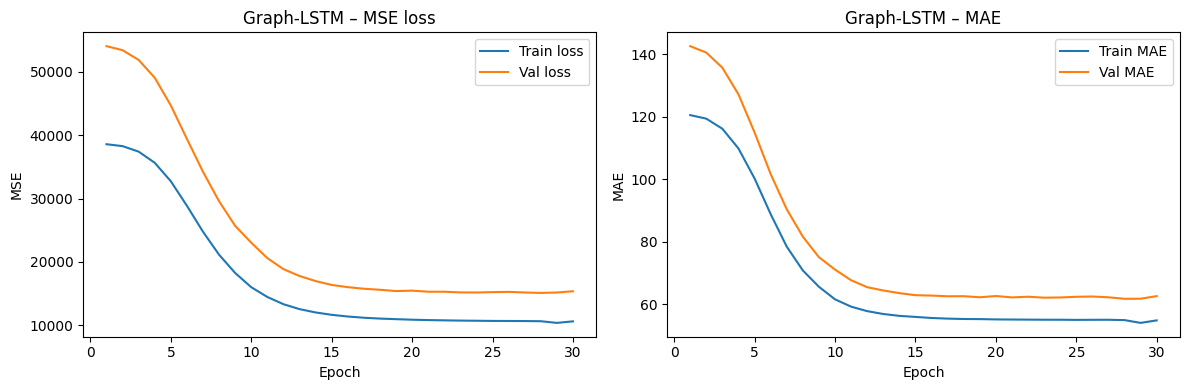

In [85]:
hist_g = history_graph.history
epochs_g = range(1, len(hist_g["loss"]) + 1)

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs_g, hist_g["loss"], label="Train loss")
plt.plot(epochs_g, hist_g["val_loss"], label="Val loss")
plt.title("Graph-LSTM – MSE loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(epochs_g, hist_g["mae"], label="Train MAE")
plt.plot(epochs_g, hist_g["val_mae"], label="Val MAE")
plt.title("Graph-LSTM – MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()


### 9.Predicting using model

In [87]:
import numpy as np
import pandas as pd

past_steps = 6      
zone_ids = demand_matrix.columns   


recent_window = demand_matrix.iloc[-past_steps:]      
recent_np = recent_window.values.astype("float32")    


neighbor_recent = (A_hat @ recent_np.T).T             


X_orig = recent_np[np.newaxis, :, :]                  
X_nei  = neighbor_recent[np.newaxis, :, :]            
X_graph_future = np.concatenate([X_orig, X_nei], axis=-1)  


next_pred = graph_lstm_model.predict(X_graph_future)[0]    


next_demand_pred = pd.Series(next_pred, index=zone_ids, name="t+1_pred")
next_demand_prediction = next_demand_pred.clip(lower=0).round().astype(int)
print(next_demand_prediction.head())


1/1 [==============================] - 0s 27ms/step
PULocationID
1     1
2     0
3    42
4    63
5     5
Name: t+1_pred, dtype: int32


In [89]:

def describe_demand(zone_id, demand):
    if demand >= 50:
        level = "a high-demand zone"
    elif demand >= 10:
        level = "moderate demand"
    else:
        level = "low demand"

    if level == "a high-demand zone":
        return f"Zone {zone_id} is {level} with about {demand} taxi pickups expected in the next hour."
    elif level == "moderate demand":
        return f"Zone {zone_id} has {level} with about {demand} taxi pickups in the next hour."
    else:
        return f"Zone {zone_id} is expected to have about {demand} taxi pickups in the next hour."



def show_zone_demand(zone_ids, predictions=next_demand_prediction):
    """
    zone_ids: int, or list/tuple of ints (e.g. 5 or [1, 3, 10])
    predictions: pandas Series with index = zone_ids, values = demand
    """
    # allow single int
    if isinstance(zone_ids, (int, str)):
        zone_ids = [zone_ids]

    for zid in zone_ids:
        zid_int = int(zid)
        if zid_int not in predictions.index.astype(int):
            print(f"Zone {zid_int} is not in the prediction index.")
            continue

        demand = int(predictions.loc[zid_int])
        print(describe_demand(zid_int, demand))


In [90]:
show_zone_demand(4)


Zone 4 is a high-demand zone with about 63 taxi pickups expected in the next hour.


In [91]:
show_zone_demand([1, 3, 4, 5])

Zone 1 is expected to have about 1 taxi pickups in the next hour.
Zone 3 has moderate demand with about 42 taxi pickups in the next hour.
Zone 4 is a high-demand zone with about 63 taxi pickups expected in the next hour.
Zone 5 is expected to have about 5 taxi pickups in the next hour.


In [92]:
user_input = input("Enter zone IDs (comma-separated) ")
zone_list = [int(z.strip()) for z in user_input.split(",") if z.strip()]
show_zone_demand(zone_list)


Enter zone IDs (comma-separated), e.g. 1,3,5:  8,89,259


Zone 8 is expected to have about 1 taxi pickups in the next hour.
Zone 89 is a high-demand zone with about 154 taxi pickups expected in the next hour.
Zone 259 is a high-demand zone with about 63 taxi pickups expected in the next hour.
